In [1]:
#Importing packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
#importing mysql package
!pip install mysql-connector-python
import mysql.connector
from mysql.connector import Error

In [3]:
#Extracting data
import mysql.connector
from mysql.connector import Error
import pandas as pd

try:
    connection = mysql.connector.connect(host='cpanel.insaid.co',
                                         database='Capstone2',
                                         user='student',
                                         password='student')
    
    if connection.is_connected():
        db_Info = connection.get_server_info()
        print("Connected to MySQL Server version ", db_Info)
        cursor = connection.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("You're connected to database: ", record)
        
# export department_data table in csv format
        sql_select_Query = "select * from department_data"
        results = pd.read_sql_query(sql_select_Query, connection)
        results.to_csv("department_data.csv", index=False)
        print("Sucessfully exported table department_data")
        
# export employee_details_data table in csv format
        sql_select_Query = "select * from employee_details_data"
        results1 = pd.read_sql_query(sql_select_Query, connection)
        results1.to_csv("employee_details_data.csv", index=False)
        print("Sucessfully exported table employee_details_data")
        
# export employee_data table in csv format
        sql_select_Query = "select * from employee_data"
        results2 = pd.read_sql_query(sql_select_Query, connection)
        results2.to_csv("employee_data.csv", index=False)
        print("Sucessfully exported table employee_data")
       
except Error as e:
    print("Error while connecting to MySQL", e)
finally:
    if (connection.is_connected()):
        cursor.close()
        connection.close()
        print("MySQL connection is closed")

Connected to MySQL Server version  5.6.49-cll-lve
You're connected to database:  ('Capstone2',)
Sucessfully exported table department_data
Sucessfully exported table employee_details_data
Sucessfully exported table employee_data
MySQL connection is closed


## **Department** **data**
This dataset contains information about each department. The schema of the dataset is as follows:

- **dept_id** – Unique Department Code
- **dept_name** – Name of the Department
- **dept_head** – Name of the Head of the Department

In [5]:
dep_data = pd.read_csv('department_data.csv')
dep_data

,dept_id,dept_name,dept_head
0,D00-IT,IT,Henry Adey
1,D00-SS,Sales,Edward J Bayley
2,D00-TP,Temp,Micheal Zachrey
3,D00-ENG,Engineering,Sushant Raghunathan K
4,D00-SP,Support,Amelia Westray
5,D00-FN,Finance,Aanchal J
6,D00-PR,Procurement,Louie Viles
7,D00-AD,Admin,Evelyn Tolson
8,D00-MN,Management,Ellie Trafton
9,D00-MT,Marketing,Reuben Swann


## Employee Details Data
This dataset consists of Employee ID, their Age, Gender and Marital Status. The schema of this dataset is as follows:

- **employee_id** – Unique ID Number for each employee
- **age** – Age of the employee
- **gender** – Gender of the employee
- **marital_status** – Marital Status of the employee

In [6]:
emp_detail = pd.read_csv('employee_details_data.csv')
emp_detail.head()

,employee_id,age,gender,marital_status
0,113558,43,Male,Married
1,112256,24,Female,Unmarried
2,112586,22,Female,Unmarried
3,108071,36,Male,Married
4,116915,38,Male,Married


In [10]:
#Getting info about the dataset
emp_detail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14245 entries, 0 to 14244
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   employee_id     14245 non-null  int64 
 1   age             14245 non-null  int64 
 2   gender          14245 non-null  object
 3   marital_status  14245 non-null  object
dtypes: int64(2), object(2)
memory usage: 445.3+ KB


No null values.

In [11]:
emp_detail['gender'].value_counts()

Male      9382
Female    4863
Name: gender, dtype: int64

In [12]:
emp_detail['marital_status'].value_counts()

Unmarried    7283
Married      6962
Name: marital_status, dtype: int64

In [16]:
emp_detail.describe(include='all')

,employee_id,age,gender,marital_status
count,14245.000000,14245.000000,14245,14245
unique,NaN,NaN,2,2
top,NaN,NaN,Male,Unmarried
freq,NaN,NaN,9382,7283
mean,112123.050544,32.889926,NaN,NaN
std,8500.457343,9.970834,NaN,NaN
min,100101.000000,22.000000,NaN,NaN
25%,105775.000000,24.000000,NaN,NaN
50%,111298.000000,29.000000,NaN,NaN
75%,116658.000000,41.000000,NaN,NaN


## Employee data
This dataset consists of each employee’s Administrative Information, Workload Information, Mutual Evaluation Information and Status.

**Target variable**

- **status** – Current employment status (Employed / Left)

**Administrative information**

- **department** – Department to which the employees belong(ed) to
- **salary** – Salary level with respect to rest of their department
- **tenure** – Number of years at the company
- **recently_promoted** – Was the employee promoted in the last 3 years?
- **employee_id** – Unique ID Number for each employee

**Workload information**

- **n_projects** – Number of projects employee has worked on
- **avg_monthly_hrs** – Average number of hours worked per month

**Mutual evaluation information**

- **satisfaction** – Score for employee’s satisfaction with the company (higher is better)
- **last_evaluation** – Score for most recent evaluation of employee (higher is better)
- **filed_complaint** – Has the employee filed a formal complaint in the last 3 years?

In [17]:
emp_data = pd.read_csv('employee_data.csv')
emp_data.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
0,246.0,NaN,NaN,0.866838,6,NaN,medium,0.134415,Left,4.0,124467
1,134.0,NaN,NaN,0.555718,2,NaN,low,0.511041,Left,3.0,112210
2,156.0,D00-SS,1.0,0.474082,2,NaN,medium,0.405101,Left,3.0,126150
3,256.0,D00-SP,NaN,0.961360,6,NaN,low,0.152974,Left,4.0,125346
4,146.0,D00-SS,NaN,0.507349,2,NaN,medium,0.434845,Left,3.0,113707


In [ ]:
#Getting info about the data
emp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14150 entries, 0 to 14149
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14150 non-null  float64
 1   department         13443 non-null  object 
 2   filed_complaint    2046 non-null   float64
 3   last_evaluation    12663 non-null  float64
 4   n_projects         14150 non-null  int64  
 5   recently_promoted  297 non-null    float64
 6   salary             14150 non-null  object 
 7   satisfaction       14000 non-null  float64
 8   status             14150 non-null  object 
 9   tenure             14000 non-null  float64
 10  employee_id        14150 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 1.2+ MB


In [22]:
emp_data_unique = emp_data.drop_duplicates()
emp_data_unique.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14121 entries, 0 to 14120
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14121 non-null  float64
 1   department         13414 non-null  object 
 2   filed_complaint    2041 non-null   float64
 3   last_evaluation    12634 non-null  float64
 4   n_projects         14121 non-null  int64  
 5   recently_promoted  297 non-null    float64
 6   salary             14121 non-null  object 
 7   satisfaction       13971 non-null  float64
 8   status             14121 non-null  object 
 9   tenure             13971 non-null  float64
 10  employee_id        14121 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 1.3+ MB


In [25]:
emp_data_duplicate = emp_data_unique[emp_data_unique.duplicated('employee_id')]
emp_data_duplicate.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
304,264.0,D00-ENG,NaN,0.774554,6,NaN,low,0.110974,Left,4.0,0
1234,129.0,D00-SP,NaN,0.402660,2,NaN,medium,0.437359,Left,3.0,0
11304,167.0,NaN,NaN,0.880053,5,NaN,low,0.682140,Employed,3.0,0
12304,259.0,D00-ENG,NaN,0.505883,5,NaN,low,0.631046,Employed,4.0,0


#### 4+1 = 5 records with Employee ID as 0

In [26]:
emp_data_unique.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14121 entries, 0 to 14120
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14121 non-null  float64
 1   department         13414 non-null  object 
 2   filed_complaint    2041 non-null   float64
 3   last_evaluation    12634 non-null  float64
 4   n_projects         14121 non-null  int64  
 5   recently_promoted  297 non-null    float64
 6   salary             14121 non-null  object 
 7   satisfaction       13971 non-null  float64
 8   status             14121 non-null  object 
 9   tenure             13971 non-null  float64
 10  employee_id        14121 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 1.3+ MB


In [31]:
# Finding if any record in emp_detail with employee ID as 0.
num_rows = len(emp_detail[emp_detail.employee_id == 0].index) 
print(num_rows)

0


In [34]:
# Joining emp_details & emp_data_unique tables with employee_id
emp_data_merge = pd.merge(emp_data_unique, emp_detail, on='employee_id', how='left')
emp_data_merge.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,age,gender,marital_status
0,246.0,NaN,NaN,0.866838,6,NaN,medium,0.134415,Left,4.0,124467,42.0,Female,Married
1,134.0,NaN,NaN,0.555718,2,NaN,low,0.511041,Left,3.0,112210,23.0,Female,Unmarried
2,156.0,D00-SS,1.0,0.474082,2,NaN,medium,0.405101,Left,3.0,126150,24.0,Female,Unmarried
3,256.0,D00-SP,NaN,0.961360,6,NaN,low,0.152974,Left,4.0,125346,51.0,Female,Married
4,146.0,D00-SS,NaN,0.507349,2,NaN,medium,0.434845,Left,3.0,113707,23.0,Female,Unmarried


In [35]:
emp_data_merge.isna().sum()

avg_monthly_hrs          0
department             707
filed_complaint      12080
last_evaluation       1487
n_projects               0
recently_promoted    13824
salary                   0
satisfaction           150
status                   0
tenure                 150
employee_id              0
age                      5
gender                   5
marital_status           5
dtype: int64

In [36]:
emp_data_merge1 = emp_data_merge[emp_data_merge['employee_id'] > 0]

In [37]:
emp_data_merge1.isna().sum()

avg_monthly_hrs          0
department             706
filed_complaint      12075
last_evaluation       1487
n_projects               0
recently_promoted    13819
salary                   0
satisfaction           150
status                   0
tenure                 150
employee_id              0
age                      0
gender                   0
marital_status           0
dtype: int64

In [39]:
# Joining emp_data_merge1 & dep_data dataframes with employee_id
emp_data_merge2 = pd.merge(emp_data_merge1, dep_data, how='left',left_on=['department'], right_on=['dept_id'])
emp_data_merge2.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,age,gender,marital_status,dept_id,dept_name,dept_head
0,246.0,NaN,NaN,0.866838,6,NaN,medium,0.134415,Left,4.0,124467,42.0,Female,Married,NaN,NaN,NaN
1,134.0,NaN,NaN,0.555718,2,NaN,low,0.511041,Left,3.0,112210,23.0,Female,Unmarried,NaN,NaN,NaN
2,156.0,D00-SS,1.0,0.474082,2,NaN,medium,0.405101,Left,3.0,126150,24.0,Female,Unmarried,D00-SS,Sales,Edward J Bayley
3,256.0,D00-SP,NaN,0.961360,6,NaN,low,0.152974,Left,4.0,125346,51.0,Female,Married,D00-SP,Support,Amelia Westray
4,146.0,D00-SS,NaN,0.507349,2,NaN,medium,0.434845,Left,3.0,113707,23.0,Female,Unmarried,D00-SS,Sales,Edward J Bayley


In [47]:
#Let's see which department sees maximum attrition
dept_attr = emp_data_merge2.groupby(['dept_name','status'], sort=False).size()
dept_attr.head(20)

dept_name    status  
Sales        Left         949
Support      Left         519
Marketing    Left         195
Product      Left         187
IT           Left         259
Admin        Left          35
Management   Left          85
Engineering  Left         654
Procurement  Left          16
Temp         Left          20
Finance      Left         193
Support      Employed    1589
Management   Employed     505
Sales        Employed    2946
IT           Employed     893
Engineering  Employed    1919
Finance      Employed     529
Procurement  Employed     157
Product      Employed     666
Admin        Employed     140
dtype: int64

### Observations
|Column with Null values | Number of null values |Possible explanation | Action suggested |
|------------------------|----------------------|------------------|-----|
|Department|707|-|-|
|filed_complaint| 12104|May be null means 0|-|
|last_evaluation|1487|-|-|
|recently_promoted|13853|May be null means 0|-|
|satisfaction|150|-|-
|tenure|150|-|-|



### Suggested Actions
- Join 'employee_data' and 'employee_details_data' on **employee_id** (Left join becuase 'employee_datails' has more employee id.)

In [ ]:
#Getting description of the data
emp_data.describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,employee_id
count,14150.000000,2046.0,12663.000000,14150.000000,297.0,14000.000000,14000.000000,14150.000000
mean,199.994346,1.0,0.718399,3.778304,1.0,0.621212,3.499357,112080.750247
std,50.833697,0.0,0.173108,1.250162,0.0,0.250482,1.462584,8748.202856
min,49.000000,1.0,0.316175,1.000000,1.0,0.040058,2.000000,0.000000
25%,155.000000,1.0,0.563711,3.000000,1.0,0.450356,3.000000,105772.500000
50%,199.000000,1.0,0.724731,4.000000,1.0,0.652394,3.000000,111291.500000
75%,245.000000,1.0,0.871409,5.000000,1.0,0.824926,4.000000,116650.750000
max,310.000000,1.0,1.000000,7.000000,1.0,1.000000,10.000000,148988.000000


In [ ]:
#Looking into 'Department Column'
emp_data['department'].value_counts()

D00-SS     3905
D00-ENG    2575
D00-SP     2113
D00-IT     1157
D00-PD      855
D00-MT      815
D00-FN      725
D00-MN      593
-IT         207
D00-AD      175
D00-PR      173
D00-TP      150
Name: department, dtype: int64

There is a value '-IT' which may be mistakingly written. It needs to be corrected to 'D00-IT'

In [ ]:
#Checking if employee_id has all unique values
emp_data['employee_id'].nunique()

14117

All the employee ids should be unique but this is not the case.

In [ ]:
emp_data['employee_id'].value_counts().head(10)

0         5
119780    2
104360    2
116850    2
109425    2
116533    2
105625    2
117454    2
102701    2
108265    2
Name: employee_id, dtype: int64

- There are 5 employee ids as 0, which is null.
- Some employee ids are appearing twice.

In [ ]:
#Number of employee ids appearing twice
emp_data.groupby('employee_id').filter(lambda x: len(x) == 2).count()

avg_monthly_hrs      58
department           58
filed_complaint      10
last_evaluation      58
n_projects           58
recently_promoted     0
salary               58
satisfaction         58
status               58
tenure               58
employee_id          58
dtype: int64

29 employee ids are appearing twice.

In [ ]:
#Checking for similar pattern in 'employee_id' in 'emp_datail' data
emp_detail['employee_id'].nunique()

14245

All values are unique.

In [ ]:
#Checking min average monthly hours
emp_data.avg_monthly_hrs.min()

49.0

In [ ]:
#Checking max average monthly hours
emp_data.avg_monthly_hrs.max()

310.0

In [ ]:
#Checking min filed complaints
emp_data.avg_monthly_hrs.max()

310.0

In [ ]:
emp_data[emp_data['employee_id']==119780]

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
14026,175.0,D00-MN,NaN,0.854538,4,NaN,medium,0.934465,Employed,3.0,119780
14147,175.0,D00-MN,NaN,0.854538,4,NaN,medium,0.934465,Employed,3.0,119780


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


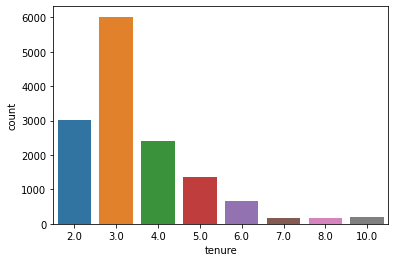

In [ ]:
#Count of employees of tenure
sns.countplot(emp_data.tenure)